In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
TSLA = pd.read_csv("/content/drive/MyDrive/DS 340W/Final Research Paper/Datasets/TSLA_5Y.csv")

In [ ]:
TSLA.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-23,51.077999,51.534000,50.660000,50.956001,50.956001,16601000
1,2017-03-24,51.139999,52.778000,51.001999,52.632000,52.632000,28236500
2,2017-03-27,52.119999,54.113998,51.950001,54.043999,54.043999,31154000
3,2017-03-28,55.403999,56.136002,55.000000,55.490002,55.490002,39938000
4,2017-03-29,55.667999,55.919998,55.108002,55.476002,55.476002,18381000
5,2017-03-30,55.608002,56.400002,55.442001,55.584000,55.584000,20742000
6,2017-03-31,55.745998,55.936001,55.264000,55.660000,55.660000,16473000
7,2017-04-03,57.380001,59.799999,56.916000,59.703999,59.703999,69443000
8,2017-04-04,59.377998,60.962002,58.905998,60.740002,60.740002,50673000
9,2017-04-05,60.408001,60.976002,58.840000,59.000000,59.000000,39404500


In [ ]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
TSLA_NEW=TSLA.dropna(axis=0)
TSLA_NEW

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-23,51.077999,51.534000,50.660000,50.956001,50.956001,16601000
1,2017-03-24,51.139999,52.778000,51.001999,52.632000,52.632000,28236500
2,2017-03-27,52.119999,54.113998,51.950001,54.043999,54.043999,31154000
3,2017-03-28,55.403999,56.136002,55.000000,55.490002,55.490002,39938000
4,2017-03-29,55.667999,55.919998,55.108002,55.476002,55.476002,18381000
...,...,...,...,...,...,...,...
1254,2022-03-16,809.000000,842.000000,802.260010,840.229980,840.229980,28009600
1255,2022-03-17,830.989990,875.000000,825.719971,871.599976,871.599976,22194300
1256,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
1257,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200


In [ ]:
TSLA_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


In [ ]:
TSLA_NEW['Close']=pd.to_numeric(TSLA_NEW.Close,errors='coerce')
TSLA_NEW = TSLA_NEW.dropna()
TSLA_TRAIN = TSLA_NEW.iloc[:,4:5].values

In [ ]:
TSLA_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
TSLA_TRAIN = sc.fit_transform(TSLA_TRAIN)
TSLA_TRAIN.shape

(1259, 1)

In [ ]:
x_train = []
y_train = []

for i in range (60,1227):
  x_train.append(TSLA_TRAIN[i-60:i,0])
  y_train.append(TSLA_TRAIN[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1167, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= False))
model.add(Dropout(0.2))


model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
37/37 - 16s - loss: 0.0152 - 16s/epoch - 427ms/step
Epoch 2/20
37/37 - 8s - loss: 0.0028 - 8s/epoch - 203ms/step
Epoch 3/20
37/37 - 7s - loss: 0.0024 - 7s/epoch - 202ms/step
Epoch 4/20
37/37 - 7s - loss: 0.0031 - 7s/epoch - 200ms/step
Epoch 5/20
37/37 - 7s - loss: 0.0031 - 7s/epoch - 202ms/step
Epoch 6/20
37/37 - 8s - loss: 0.0030 - 8s/epoch - 219ms/step
Epoch 7/20
37/37 - 7s - loss: 0.0021 - 7s/epoch - 202ms/step
Epoch 8/20
37/37 - 7s - loss: 0.0021 - 7s/epoch - 201ms/step
Epoch 9/20
37/37 - 8s - loss: 0.0020 - 8s/epoch - 204ms/step
Epoch 10/20
37/37 - 7s - loss: 0.0022 - 7s/epoch - 202ms/step
Epoch 11/20
37/37 - 7s - loss: 0.0021 - 7s/epoch - 202ms/step
Epoch 12/20
37/37 - 7s - loss: 0.0022 - 7s/epoch - 202ms/step
Epoch 13/20
37/37 - 7s - loss: 0.0027 - 7s/epoch - 203ms/step
Epoch 14/20
37/37 - 7s - loss: 0.0018 - 7s/epoch - 202ms/step
Epoch 15/20
37/37 - 7s - loss: 0.0016 - 7s/epoch - 201ms/step
Epoch 16/20
37/37 - 7s - loss: 0.0017 - 7s/epoch - 202ms/step
Epoch 17/20
37/

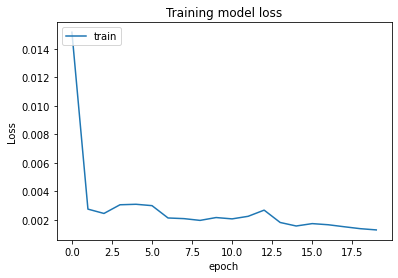

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
TSLA_NEW.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
TSLA_TEST = pd.read_csv("/content/drive/MyDrive/DS 340W/Final Research Paper/Datasets/TSLA_5Y.csv")
TSLA_TEST["Close"]=pd.to_numeric(TSLA_TEST.Close, errors='coerce')
TSLA_TEST = TSLA_TEST.dropna()
TSLA_TEST = TSLA_TEST.iloc[:,4:5]
y_test = TSLA_TEST.iloc[60:,0:].values

inputClosing = TSLA_TEST.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(TSLA_TEST)
timestep = 60
for i in range (timestep, length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(1199, 60, 1)

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([[0.03299105],
       [0.03339405],
       [0.03366734],
       ...,
       [0.6261881 ],
       [0.62827843],
       [0.63630193]], dtype=float32)

In [ ]:
predicted_price = sc.inverse_transform(y_predict)

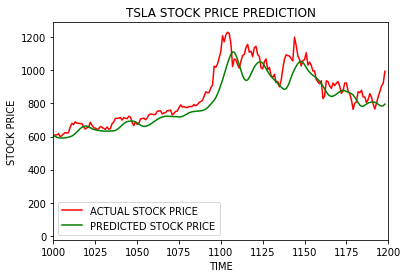

In [ ]:
plt.plot(y_test, color='red', label='ACTUAL STOCK PRICE')
plt.plot(predicted_price, color='green', label='PREDICTED STOCK PRICE')
plt.title('TSLA STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('STOCK PRICE')
plt.legend()
plt.xlim([1000, 1200])
plt.show()

In [ ]:
from sklearn import metrics